In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [51]:
path = 'C:\\Users\\iodaa\\Documents\\one\\Data\\'

df = pd.read_csv(path+"heart.csv", encoding='cp1251')

На сайте писало что в таблице больше записей, но я уже начал с ними работать, так тчо сдаю чт вышло.

Описание переводил гуглтранслейтом, скорее всего криво.

Эта база данных содержит 76 атрибутов, но все опубликованные эксперименты относятся к подмножеству из 14 из них.

Содержание

Информация об атрибутах:

1.age - возраст

2.sex - пол

3.cp - тип боли в груди (4 значения)

4.trestbps - артериальное давление в покое

5.chol - холесторал сыворотки в мг / дл

6.fbs - уровень сахара в крови натощак> 120 мг / дл

7.restecg - результаты электрокардиографии в покое (значения 0,1,2)

8.thalach - достигнутая максимальная частота сердечных сокращений

9.exang - стенокардия, вызванная физической нагрузкой

10.oldpeak - депрессия ST, вызванная упражнениями по сравнению с отдыхом

11.slope - наклон сегмента ST при пиковой нагрузке

12.ca - количество крупных сосудов (0-3), окрашенных флурозопией

13.thal - 3 = нормальный; 6 = исправленный дефект; 7 = обратимый дефект

14.target - наличие у пациента сердечного заболевания 0 или 1

In [52]:
df.describe()

,п»їage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   п»їage    303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Проверим несколько гепотез.

1)Среднее артеральное давление людей составляет 125

2)Старые люди более подвержены сердечные заболеваниям и стенокардии.

3)артериальное давление влияет на сердечные заболевания.

In [55]:
x = df["trestbps"]

(array([10., 42., 67., 74., 57., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

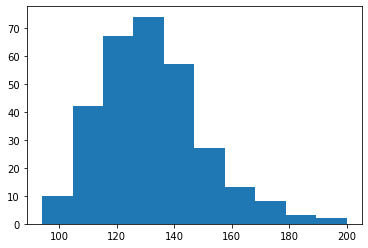

In [58]:
plt.hist(x, bins=10)

Видим что распределение артериального давления близко к нормальному. Перепроверим при помощи Q-Q кривой.

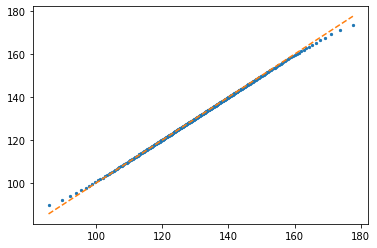

In [62]:
loc = x.mean()
scale = x.std()

interval = np.linspace(0, 1, len(x))[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(x, interval)

plt.scatter(x, y, s=5)
plt.plot(x, x, color='C1', linestyle='dashed')

Убеждаемся в номральности распределения. Значения почти идеально ложаться на прямую.

Теперь проверим гепотезу о том что среднее артериальное давление в людей 125. Диспрсию этого параметра для всех людей на свете мы не знаем, по этому используем т-статистику.

In [75]:
alpha = 0.05
def statistic(samples):
    return (samples.mean() - 125) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

n = len(x)

S = statistic(x)

p_left = stats.norm.cdf(S)
p_right = 1 - stats.norm.cdf(S)
pvalue = 2 * min(p_left, p_right)

pvalue

8.601785950190788e-12

Как мы видим P-value очень маленькое значение, значит для почти любой альфа нулевая гипотеза поттверждается. Среднее артеральное давление людей составляет 125

Проверяем вторую гипотезу. Старые люди более подвержены сердечные заболеваниям и стенокардии.
В начале попробую сравнить интересующие нас параметры в двух выборках для людей меньше медианного возраста и больше.

In [79]:
df["п»їage"].median()

55.0

Меданный возраст для нашей выборки составляет 55 лет. Это довольно высокий показатель, возможно данные будут искажены. Разделим выборку на две, тех кто старше 55 и тех кто моложе

In [84]:
x1 = df.loc[df["п»їage"] <= 55]
x2 = df.loc[df["п»їage"] > 55]

In [89]:
print(f'younger people: {x1[["exang","target"]].mean()}')
print(f'old people{x2[["exang","target"]].mean()}')

younger people: exang     0.282895
target    0.677632
dtype: float64
old peopleexang     0.370861
target    0.410596
dtype: float64


Данное исследование нам показывает что для нашей выборки сердце более молодых людей лучше справляется с физическими нагрузками, но в целом имеет больше вероятность сердечных заболеваний. Проверим это метематичкески.

Для этого снова поделим нашу выборку на две части. Теперь по категории есть или нет сердечные заболвания и есть или нет стенокардия при физической нагрузке.

In [104]:
y1 = df.loc[df["target"] == 0]
n1 = len(y1)
y1_mean = y1["п»їage"].mean()

y2 = df.loc[df["target"] == 1]
n2 = len(y2)
y2_mean = y2["п»їage"].mean()

y3 = df.loc[df["exang"] == 0]
n3 = len(y3)
y3_mean = y3["п»їage"].mean()

y4 = df.loc[df["exang"] == 1]
n4 = len(y4)
y4_mean = y4["п»їage"].mean()

mean = df["п»їage"].mean()

y1_mean, y2_mean, y3_mean, y4_mean, mean

(56.60144927536232,
 52.4969696969697,
 53.754901960784316,
 55.62626262626262,
 54.366336633663366)

In [111]:
S2_b_1 = n1 * (y1_mean - mean) ** 2 + n2 * (y2_mean - mean) ** 2
S2_w_1 = ((y1["п»їage"] - y1_mean) ** 2).sum() + ((y2["п»їage"] - y2_mean) ** 2).sum()

S2_b_2 = n3 * (y3_mean - mean) ** 2 + n4 * (y4_mean - mean) ** 2
S2_w_2 = ((y3["п»їage"] - y3_mean) ** 2).sum() + ((y4["п»їage"] - y4_mean) ** 2).sum()

S2_b_1, S2_w_1, S2_b_2, S2_w_2

(1266.0084386699532, 23644.32819499341, 233.41981845243197, 24676.916815210934)

In [115]:
k = 2
n_1 = n1 + n2
n_2 = n3 + n4

k1 = k - 1
k2_1 = n_1 - k
k2_2 = n_2 - k

sigma2_b_1 = S2_b_1 / k1
sigma2_w_1 = S2_w_1 / k2_1

sigma2_b_2 = S2_b_2 / k1
sigma2_w_2 = S2_w_2 / k2_2

sigma2_b_1, sigma2_w_1, sigma2_b_2, sigma2_w_2

(1266.0084386699532, 78.55258536542661, 233.41981845243197, 81.98311234289346)

In [118]:
T_1 = sigma2_b_1 / sigma2_w_1
T_2 = sigma2_b_2 / sigma2_w_2

T_1, T_2

(16.116699823188277, 2.847169517987511)

In [119]:
alpha = 0.05

F_crit_1 = stats.f.ppf(1 - alpha, k1, k2_1)
F_crit_2 = stats.f.ppf(1 - alpha, k1, k2_2)

F_crit_1, F_crit_2

(3.8725380423850146, 3.8725380423850146)

На основе нашей выборки мы доказали что возраст влияет на наличие сердечных заболеваний, но не влияет на стенокардии при физической нагрузке (при уровне значимости 0.05)

Аналогично проверяем третью гипотезу.

In [121]:
y1_mean = y1["trestbps"].mean()
y2_mean = y2["trestbps"].mean()

y1_mean, y2_mean

(134.3985507246377, 129.3030303030303)

In [122]:
S2_b_1 = n1 * (y1_mean - mean) ** 2 + n2 * (y2_mean - mean) ** 2
S2_w_1 = ((y1["п»їage"] - y1_mean) ** 2).sum() + ((y2["п»їage"] - y2_mean) ** 2).sum()

S2_b_1, S2_w_1

(1810470.259923819, 1832237.21541502)

In [124]:
sigma2_b_1 = S2_b_1 / k1
sigma2_w_1 = S2_w_1 / k2_1

sigma2_b_1, sigma2_w_1

(1810470.259923819, 6087.166828621329)

In [128]:
T_1 = sigma2_b_1 / sigma2_w_1

T_1

297.4241237173171

In [129]:
F_crit_1 = stats.f.ppf(1 - alpha, k1, k2_1)

F_crit_1

3.8725380423850146

Т значительно больше критического значения, значит артериальное давление влияет на наличие сердечных заболеваний.